In [ ]:
from dotenv import load_dotenv
from langchain_teddynote import logging

logging.langsmith("allforone")

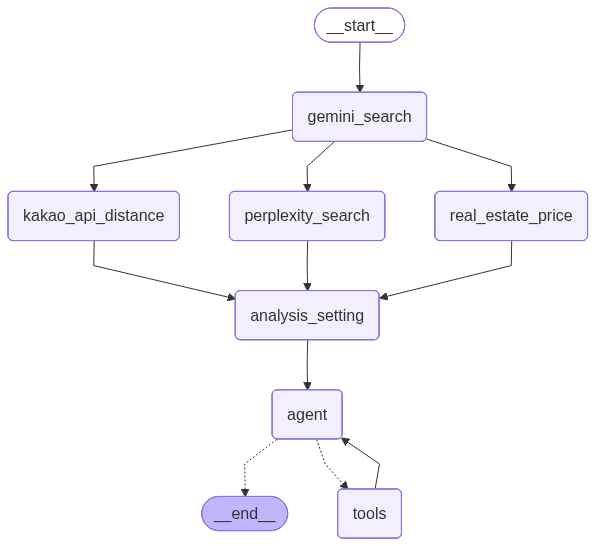

In [1]:
from agents.analysis.nearby_market_agent import graph_builder

graph = graph_builder.compile()
graph

In [ ]:
from agents.analysis.nearby_market_agent import nearby_market_graph

invoke = await nearby_market_graph.ainvoke(
{ "start_input": { "policy_count": 2, "policy_list": "[2025.10.15, 2025.6.27]", "email": "immortal0900@gmail.com", "target_area": "서울 서초구 방배동 541-2", "total_units": "2369세대", "main_type": "84제곱미터", "brand": "방배포레스트자이", } }
)

[DEBUG] 202511월에서 거래 발견, 최신 거래 선택
[DEBUG] 202511월에서 거래 발견, 최신 거래 선택
[DEBUG] 202511월에서 거래 발견, 최신 거래 선택
📎 _주변단지_정보_temp 링크: https://drive.google.com/uc?id=19e9rE8UdvqT_tU1SX3qUR0omJsI3vc3P&export=download


In [3]:
print(invoke)

{'start_input': {'policy_period': '최근 1년', 'policy_count': 2, 'policy_list': '[2025.10.15, 2025.6.27]', 'email': 'dlwlstjq410@gmail.com', 'target_area': '서울시 송파구 신천동', 'total_units': '2275세대', 'main_type': '84', 'brand': '래미안아이파크'}, 'nearby_market_output': {'result': '{\n  "매매아파트": [\n    {\n      "주소와단지명": "서울시 송파구 신천동 파크리오",\n      "전체세대수": "6864세대",\n      "타입": "84㎡",\n      "평당매매가격": "1,143만원",\n      "준공연도": "2008년",\n      "사업지와의 거리": "약 0.2km",\n      "거래일자": "2025-10~11월 (최근 1년 기준)",\n      "입지정보": "잠실나루역(2호선) 초역세권, 올림픽공원, 한강공원 인접"\n    },\n    {\n      "주소와단지명": "서울시 송파구 잠실동 잠실엘스",\n      "전체세대수": "5678세대",\n      "타입": "84㎡",\n      "평당매매가격": "1,260만원",\n      "준공연도": "2008년",\n      "사업지와의 거리": "약 1.0km",\n      "거래일자": "2025-10~11월 (최근 1년 기준)",\n      "입지정보": "잠실새내역(2호선) 연결, 종합운동장 MICE 개발, 우수 학군"\n    },\n    {\n      "주소와단지명": "서울시 송파구 잠실동 리센츠",\n      "전체세대수": "5563세대",\n      "타입": "84㎡",\n      "평당매매가격": "1,553만원",\n      "준공연도": "2008년",\n      "사업지와의 거리": "약 1.2km",\

In [ ]:
# Tool 사용 내역 확인
print("=" * 50)
print("🔧 Tool 사용 내역")
print("=" * 50)

for i, msg in enumerate(invoke['messages']):
    msg_type = type(msg).__name__
    
    # AIMessage에서 tool_calls 확인
    if msg_type == 'AIMessage' and hasattr(msg, 'tool_calls') and msg.tool_calls:
        print(f"\n[{i}] AI가 호출한 Tools:")
        for tool_call in msg.tool_calls:
            print(f"  📍 {tool_call['name']}")
            print(f"     Args: {tool_call['args']}")
    
    # ToolMessage에서 실행 결과 확인
    elif msg_type == 'ToolMessage':
        print(f"\n[{i}] Tool 실행 결과:")
        print(f"  📍 {msg.name}")
        # 내용이 너무 길 수 있으므로 앞부분만 출력
        content_preview = msg.content[:200] + "..." if len(msg.content) > 200 else msg.content
        print(f"     Result: {content_preview}")

In [4]:
print(invoke["messages"])

[SystemMessage(content='<ROLE>\n당신은 부동산 리서치의 **주변 시세 및 경쟁 단지 비교 전문가**입니다.\n보고서의 ‘입지분석’ 섹션을 작성하며, 단순 나열이 아닌 **선별·해석·연결**을 수행합니다.   \n</ROLE>\n\n<INPUT>\n- 사업지: 서울시 송파구 신천동\n- 주요타입: 84\n- 전체세대수: 2275세대\n- 일시: 2025년 11월 10일\n- 매매아파트/분양아파트 정보: {\n  "매매아파트": [\n    {\n      "주소와단지명": "서울시 송파구 신천동 파크리오",\n      "세대수": "6864세대",\n      "타입": "84㎡",\n      "평당매매가격": "약 6,850만원",\n      "준공연도": "2008년",\n      "사업지와의의거리": "약 0.2km",\n      "주변호재": "잠실나루역(2호선) 초역세권, 올림픽공원, 한강공원 인접"\n    },\n    {\n      "주소와단지명": "서울시 송파구 잠실동 잠실엘스",\n      "세대수": "5678세대",\n      "타입": "84㎡",\n      "평당매매가격": "약 7,250만원",\n      "준공연도": "2008년",\n      "사업지와의의거리": "약 1.0km",\n      "주변호재": "잠실새내역(2호선) 연결, 종합운동장 MICE 개발, 우수 학군"\n    },\n    {\n      "주소와단지명": "서울시 송파구 잠실동 리센츠",\n      "세대수": "5563세대",\n      "타입": "84㎡",\n      "평당매매가격": "약 7,180만원",\n      "준공연도": "2008년",\n      "사업지와의의거리": "약 1.2km",\n      "주변호재": "잠실새내역(2호선) 연결, 한강공원 접근성, 우수 학군"\n    }\n  ],\n  "분양아파트": [\n    {\n      "주소와단지명": "서울시 송파구 신천동

In [ ]:
output = invoke["nearby_market_output"]

result_json = output["result"]

print("=" * 50)
print("📊 최종 분석 결과")
print("=" * 50)
print(result_json)

📊 최종 분석 결과
{
  "매매아파트": [
    {
      "주소와단지명": "서울시 송파구 신천동 파크리오",
      "전체세대수": "6864세대",
      "타입": "84㎡",
      "평당매매가격": "1,143만원",
      "준공연도": "2008년",
      "사업지와의 거리": "약 0.2km",
      "거래일자": "2025-10~11월 (최근 1년 기준)",
      "입지정보": "잠실나루역(2호선) 초역세권, 올림픽공원, 한강공원 인접"
    },
    {
      "주소와단지명": "서울시 송파구 잠실동 잠실엘스",
      "전체세대수": "5678세대",
      "타입": "84㎡",
      "평당매매가격": "1,260만원",
      "준공연도": "2008년",
      "사업지와의 거리": "약 1.0km",
      "거래일자": "2025-10~11월 (최근 1년 기준)",
      "입지정보": "잠실새내역(2호선) 연결, 종합운동장 MICE 개발, 우수 학군"
    },
    {
      "주소와단지명": "서울시 송파구 잠실동 리센츠",
      "전체세대수": "5563세대",
      "타입": "84㎡",
      "평당매매가격": "1,553만원",
      "준공연도": "2008년",
      "사업지와의 거리": "약 1.2km",
      "거래일자": "2025-10~11월 (최근 1년 기준)",
      "입지정보": "잠실새내역(2호선) 연결, 한강공원 접근성, 우수 학군"
    }
  ],
  "분양아파트": [
    {
      "주소와단지명": "서울시 송파구 신천동 잠실 래미안 아이파크",
      "전체세대수": "2678세대",
      "타입": "84㎡",
      "평당분양가격": "19,030,000원",
      "청약경쟁률": "1순위 평균 268.7:1 (특별공급 140:1, 1순위 268

: 

In [ ]:
print("=" * 50)
print("🔍 Gemini 검색 결과")
print("=" * 50)
print(output["gemini_search"])

In [ ]:
import json
print("=" * 50)
print("📍 카카오 API 위치 정보")
print("=" * 50)
print(json.dumps(output["kakao_api_distance_context"], ensure_ascii=False, indent=2))

In [ ]:
print("=" * 50)
print("real_estate_price 검색 결과")
print("=" * 50)
print(output["real_estate_price_context"])

In [ ]:
print("=" * 50)
print("🌐 Perplexity 검색 결과")
print("=" * 50)
print(output["perplexity_search"])